In [4]:
import pandas as pd
import numpy as np

In [5]:
import matplotlib.pyplot as plt
import seaborn as sn

In [65]:
df = pd.read_csv('placement.csv')

In [66]:
df

,cgpa,placement_exam_marks,placed
0,7.19,26.0,1
1,7.46,38.0,1
2,7.54,40.0,1
3,6.42,8.0,1
4,7.23,17.0,0
...,...,...,...
995,8.87,44.0,1
996,9.12,65.0,1
997,4.89,34.0,0
998,8.62,46.0,1


In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 3 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   cgpa                  1000 non-null   float64
 1   placement_exam_marks  1000 non-null   float64
 2   placed                1000 non-null   int64  
dtypes: float64(2), int64(1)
memory usage: 23.6 KB


In [68]:
df.describe()

,cgpa,placement_exam_marks,placed
count,1000.000000,1000.000000,1000.000000
mean,6.961240,32.225000,0.489000
std,0.615898,19.130822,0.500129
min,4.890000,0.000000,0.000000
25%,6.550000,17.000000,0.000000
50%,6.960000,28.000000,0.000000
75%,7.370000,44.000000,1.000000
max,9.120000,100.000000,1.000000


In [69]:
df.isna().sum()

cgpa                    0
placement_exam_marks    0
placed                  0
dtype: int64

<Axes: xlabel='placement_exam_marks', ylabel='Count'>

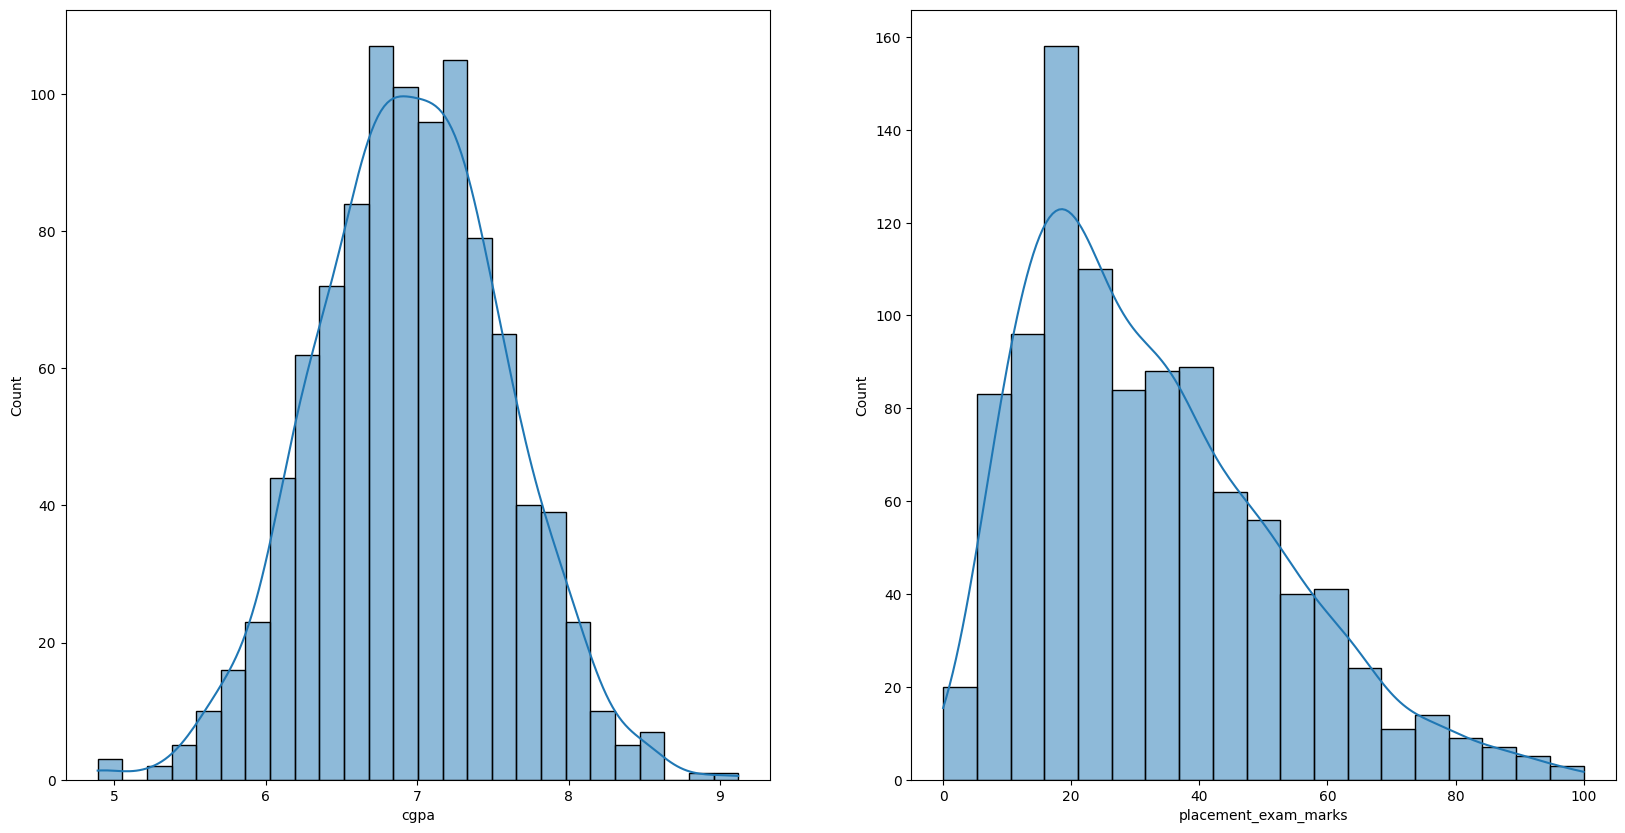

In [70]:
plt.figure(figsize=(20,10))

plt.subplot(121)
sn.histplot(df['cgpa'], kde= True)


plt.subplot(122)
sn.histplot(df['placement_exam_marks'], kde= True)

In [71]:
df['placement_exam_marks'].skew()

0.8356419499466834

In [72]:
df['cgpa'].skew()

-0.014529938929314918

In [73]:
df.describe()

,cgpa,placement_exam_marks,placed
count,1000.000000,1000.000000,1000.000000
mean,6.961240,32.225000,0.489000
std,0.615898,19.130822,0.500129
min,4.890000,0.000000,0.000000
25%,6.550000,17.000000,0.000000
50%,6.960000,28.000000,0.000000
75%,7.370000,44.000000,1.000000
max,9.120000,100.000000,1.000000


<Axes: ylabel='placement_exam_marks'>

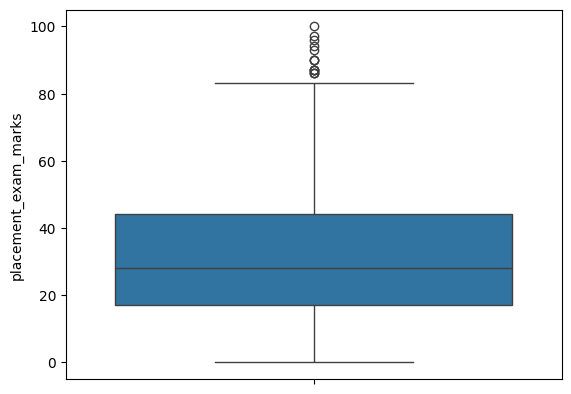

In [74]:
sn.boxplot(df['placement_exam_marks'])

<Axes: ylabel='cgpa'>

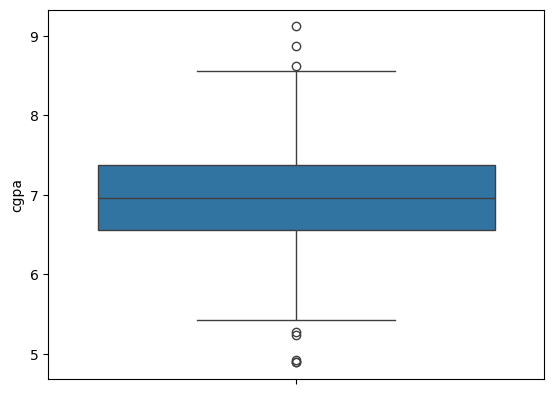

In [75]:
sn.boxplot(df['cgpa'])

In [76]:
percentile25 = df['placement_exam_marks'].quantile(0.25)
percentile75 = df['placement_exam_marks'].quantile(0.75)

In [77]:
percentile75

44.0

In [78]:
percentile25

17.0

In [79]:
iqr = percentile75 - percentile25

In [80]:
iqr

27.0

In [81]:
upper_limit = percentile75 + 1.5 *iqr
lower_limit = percentile25 - 1.5 *iqr

In [82]:
upper_limit

84.5

In [83]:
lower_limit

-23.5

In [84]:
df[df['placement_exam_marks'] > upper_limit]

,cgpa,placement_exam_marks,placed
9,7.75,94.0,1
40,6.60,86.0,1
61,7.51,86.0,0
134,6.33,93.0,0
162,7.80,90.0,0
283,7.09,87.0,0
290,8.38,87.0,0
311,6.97,87.0,1
324,6.64,90.0,0
630,6.56,96.0,1


In [85]:
df[df['placement_exam_marks'] < lower_limit]

,cgpa,placement_exam_marks,placed


In [86]:
df2 = df[df['placement_exam_marks'] < upper_limit]

In [87]:
df2

,cgpa,placement_exam_marks,placed
0,7.19,26.0,1
1,7.46,38.0,1
2,7.54,40.0,1
3,6.42,8.0,1
4,7.23,17.0,0
...,...,...,...
995,8.87,44.0,1
996,9.12,65.0,1
997,4.89,34.0,0
998,8.62,46.0,1


<Axes: ylabel='placement_exam_marks'>

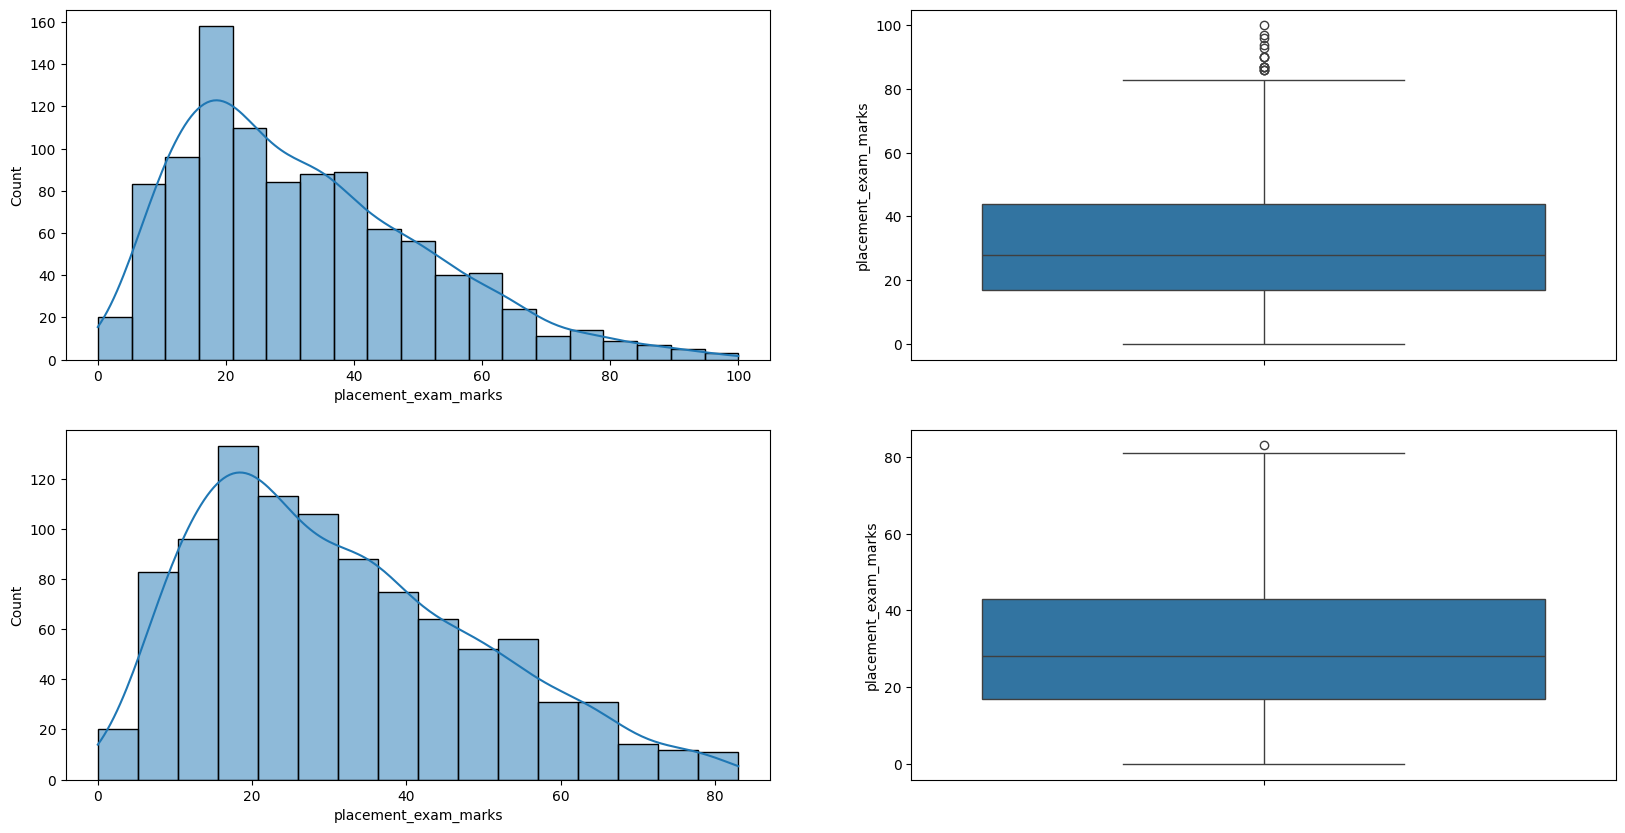

In [88]:
plt.figure(figsize=(20,10))
plt.subplot(221)
sn.histplot(df['placement_exam_marks'], kde=True)


plt.subplot(222)
sn.boxplot(df['placement_exam_marks'])


plt.subplot(223)
sn.histplot(df2['placement_exam_marks'], kde= True)


plt.subplot(224)
sn.boxplot(df2['placement_exam_marks'])

In [89]:
new_df_cap = df.copy()

new_df_cap['placement_exam_marks'] = np.where(
    new_df_cap['placement_exam_marks'] > upper_limit,
    upper_limit,
    np.where(
        new_df_cap['placement_exam_marks'] < lower_limit,
        lower_limit,
        new_df_cap['placement_exam_marks']
    )
)

In [90]:
new_df_cap

,cgpa,placement_exam_marks,placed
0,7.19,26.0,1
1,7.46,38.0,1
2,7.54,40.0,1
3,6.42,8.0,1
4,7.23,17.0,0
...,...,...,...
995,8.87,44.0,1
996,9.12,65.0,1
997,4.89,34.0,0
998,8.62,46.0,1


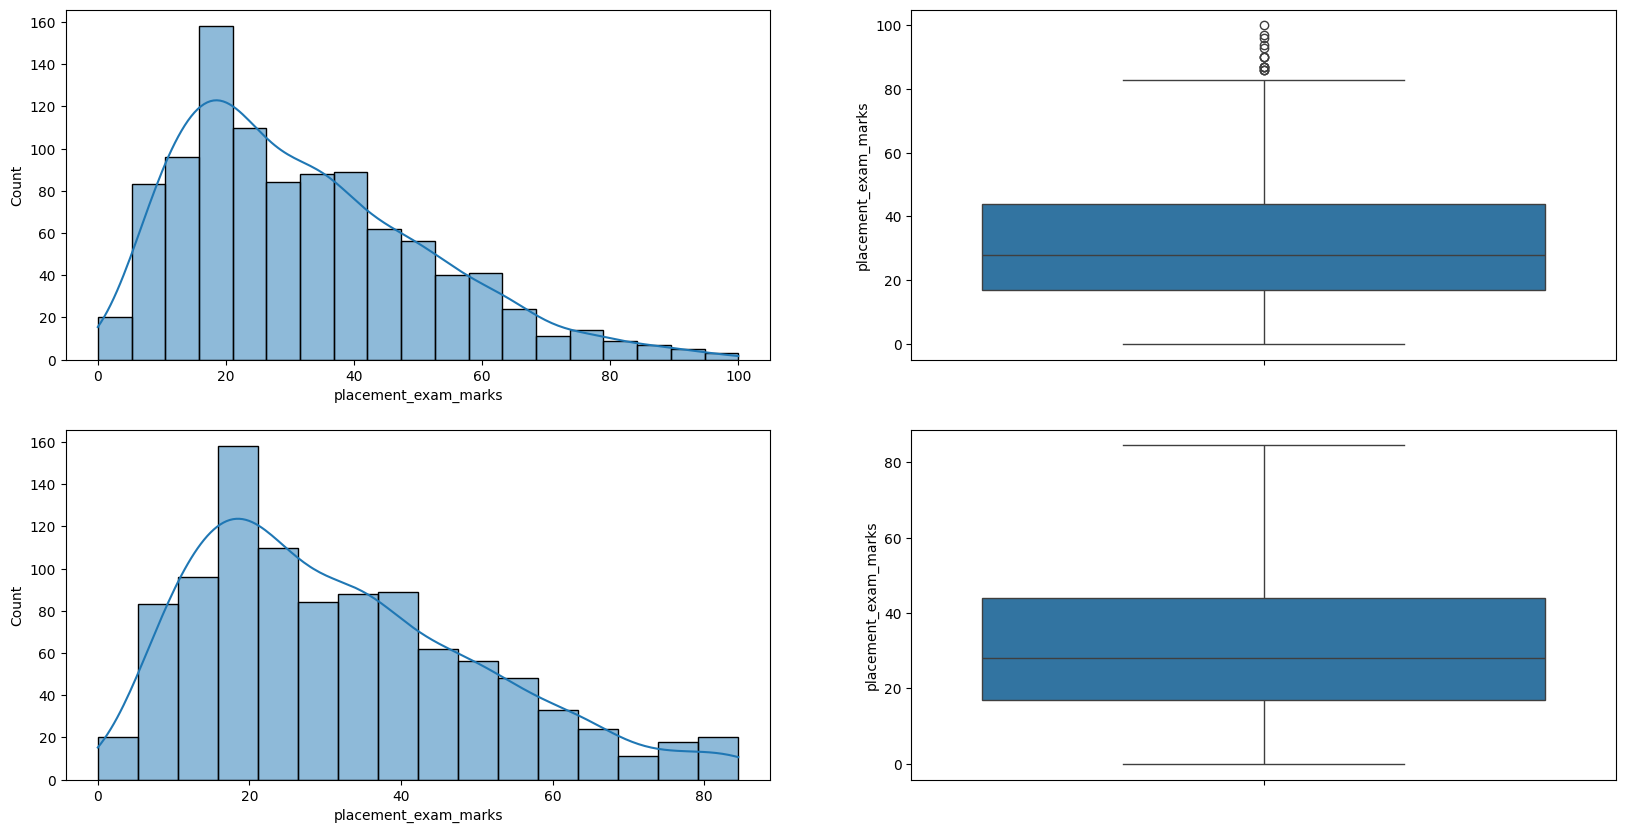

In [91]:
plt.figure(figsize=(20,10))
plt.subplot(2,2,1)
sn.histplot(df['placement_exam_marks'], kde=True)

plt.subplot(2,2,2)
sn.boxplot(df['placement_exam_marks'])

plt.subplot(2,2,3)
sn.histplot(new_df_cap['placement_exam_marks'], kde= True)

plt.subplot(2,2,4)
sn.boxplot(new_df_cap['placement_exam_marks'])

plt.show()